# One Hidden Layer NN
---
We will build a shallow dense neural network with one hidden layer, and the following structure is used for illustration purpose.

<img src='images/1-hidden-nn.png'>

Where in the graph above, we have a input vector $x = (x_1, x_2)$, containing 2 features and 4 hidden units $a1, a2, a3$ and $a4$, and output one value $y_1 \in [0, 1]$ (consider this a binary classification task with a prediction of probability)

In each hidden unit, take $a_1$ as example, a linear operation followed by an activation function is conducted. So given input $x = (x_1, x_2)$, inside node $a_1$, we have:

$$z_1 = w_{11}x_1 + w_{12}x_2$$
$$a_1 = activation(z_1)$$

Here $w_{11}$ denotes weight 1 of node 1, $w_{12}$ denotes weight 2 of node 1. Same for node $a_2$, it would have:

$$z_2 = w_{21}x_1 + w_{22}x_2$$
$$a_2 = activation(z_2)$$

And same for $a_3$ and $a_4$ and so on ...

# Vectorization of One Input
---
Now let's put the weights into matrix and input into a vector to simplify the expression.

$$ z^{[1]} = W^{[1]}x + b^{[1]} \tag1 $$

$$ a^{[1]} = \tanh{Z^{[1]}} \tag2 $$

$$ z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} \tag3 $$

$$ \hat{y} = a^{[2]} = \sigma({Z^{[2]}}) \tag4 $$

$$ L(y, \hat{y}) = -[y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})}] $$

Here we've assumed that the second activation function to be $\tanh$ and the output activation function to be $sigmoid$ (note that superscript $[i]$ denotes the $ith$ layer). 

For the dimension of each matrix, we have:

- $ W^{[1]}$ in the case above would have dimension $4 \times 2$, with each $ith$ row is the weight of node $i$
- $b^{[1]}$ has dimension $4 \times 1$
- $z^{[1]}$ and $a^{[1]}$ both have dimention $4 \times 1$
- $W^{[2]}$ has dimension $1 \times 4$
- consequently, $z^{[2]}$ and $a^{[2]}$ would have dimensition $1 \times 1$, which is a single value

The loss function $L$ for a single value would be the same as logistic regression's.

Function $\tanh$ and $sigmoid$ looks as below.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Text(0.5, 1.0, 'tanh')

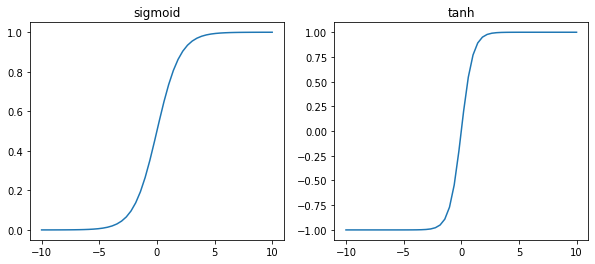

In [3]:
plt.figure(figsize=[10, 4])
x = np.linspace(-10, 10)

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('sigmoid')

plt.subplot(1, 2, 2)
plt.plot(x, tanh(x))
plt.title('tanh')

Notice that the only difference of these functions is the scale of y

# Formula of Batch Training
---
The above shows the formula of a single input vector, however in actual training processes, a batch is trained instead of 1 at a time. The change applied in the formula is trivial, we just need to replace the single vector $x$ with a matrix $X$ with size $n \times m$, where $n$ is number of features and $m$ is the the batch size -- samples are stacked column wise, and the following result matrix are applied likewise.

$$ Z^{[1]} = W^{[1]}X + b^{[1]} \tag5 $$

$$ A^{[1]} = \tanh{Z^{[1]}} \tag6 $$

$$ Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} \tag7 $$

$$ \hat{Y} = A^{[2]} = \sigma({Z^{[2]}}) \tag8 $$

$$ J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i}^{m}L(y^{(i)}, \hat{y}^{(i)}) \tag9 $$

For the dimension of each matrix taken in this example, we have:

- $X$ has dimension $2 \times m$, as here there are 2 features and $m$ is the batch size
- $W^{[1]}$ in the case above would have dimension $4 \times 2$, with each $ith$ row is the weight of node $i$
- $b^{[1]}$ has dimension $4 \times 1$
- $Z^{[1]}$ and $A^{[1]}$ both have dimension $4 \times m$
- $W^{[2]}$ has dimension $1 \times 4$
- consequently, $Z^{[2]}$ and $A^{[2]}$ would have dimension $1 \times m$

Same as logistic regression, for batch training, the average loss for all training samples.

This is all for the forward propagation. To activate our neurons to learn, we need to get derivative of weight parameters and update them use gradient descent.

But now it is enough for us to implement the forward propagation first.

# Generate Sample Dataset
---
Here we generate a simple binary classification task with 5000 data points and 20 features for later model validation.

In [4]:
from sklearn import datasets


X, y = datasets.make_classification(n_samples=5000, random_state=123)

X_train, X_test = X[:4000], X[4000:]
y_train, y_test = y[:4000], y[4000:]

print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (4000, 20)
test shape (1000, 20)


# Weights Initialization
---
Our neural network has 1 hidden layer and 2 layers in total(hidden layer + output layer), so there are 4 weight matrices to initialize ($W^{[1]}, b^{[1]}$ and $W^{[2]}, b^{[2]}$). Notice that the weights are initialized relatively small so that the gradients would be higher thus learning faster in the beginning phase.

In [5]:
def init_weights(n_input, n_hidden, n_output):
    params = {}
    params['W1'] = np.random.randn(n_hidden, n_input) * 0.01
    params['b1'] = np.zeros((n_hidden, 1))
    params['W2'] = np.random.randn(n_output, n_hidden) * 0.01
    params['b2'] = np.zeros((n_output, 1))
    
    return params

In [6]:
params = init_weights(20, 10, 1)

print('W1 shape', params['W1'].shape)
print('b1 shape', params['b1'].shape)
print('W2 shape', params['W2'].shape)
print('b2 shape', params['b2'].shape)

W1 shape (10, 20)
b1 shape (10, 1)
W2 shape (1, 10)
b2 shape (1, 1)


# Forward Propagation
---
Let's implement the forward process following equations $(5) \sim (8)$.

In [7]:
def forward(X, params):
    """
    X: need to have shape (n_features x m_samples)
    """
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    A0 = X
    
    cache = {}
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache['Z1'] = Z1
    cache['A1'] = A1
    cache['Z2'] = Z2
    cache['A2'] = A2
    return  cache

In [8]:
# get 100 samples
inp = X[:100].T

cache = forward(inp, params)

print('Z1 shape', cache['Z1'].shape)
print('A1 shape', cache['A1'].shape)
print('Z2 shape', cache['Z2'].shape)
print('A2 shape', cache['A2'].shape)

Z1 shape (10, 100)
A1 shape (10, 100)
Z2 shape (1, 100)
A2 shape (1, 100)


# Loss Function
---
Following equation $(9)$, let's calculate the loss of each batch.

In [9]:
def loss(Y, Y_hat):
    """
    Y: vector of true value
    Y_hat: vector of predicted value
    """
    assert Y.shape[0] == 1
    assert Y.shape == Y_hat.shape
    m = Y.shape[1]
    s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
    loss = -np.sum(s) / m
    return loss

In [10]:
Y = np.array([np.random.choice([0, 1]) for i in range(10)]).reshape(1, -1)
Y_hat = np.random.uniform(0, 1, 10).reshape(1, -1)

l = loss(Y, Y_hat)
print(f'loss {l}')

loss 1.4237153959578408


# Back Propagation
---
Now it comes to the back propagation which is the key to our weights update. Given the loss function $L$ we defined above, we have gradients as follows:

$$ dZ^{[2]} = A^{[2]} - Y \tag1 $$

$$ dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]^T} \tag2 $$

$$ db^{[2]} = \frac{1}{m}np.sum(dZ^{[2]}, axis=1, keepdims=True) \tag3 $$

$$ dZ^{[1]} = W^{[2]T}dZ^{[2]} * (1 - Z^{[1]^2}) \tag4 $$

$$ dW^{[1]} = \frac{1}{m}dZ^{[1]}X^{T} \tag5 $$

$$ db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis=1, keepdims=True) \tag6 $$

In equation $(4)$ is element-wise multiplication, and the gradient of $\tanh{x}$ is $1 - x^2$. You can try to deduct the equation above by yourself, but I basically took it from internet.

Let's break down the shape of each element, given number of each layer equals `(n_x, n_h, n_y)` and batch size equals `m`:

- $A^{[2]}$, $Y$ and $dZ^{[2]}$ has shape `(n_y, m)`
- Because $A^{[1]}$ has shape `(n_h, m)`, $dW^{[2]}$ would have shape `(n_y, n_h)`
- $db^{[2]}$ has shape `(n_y, 1)`

- Because $dZ^{[2]}$ has shape `(n_y, m)`, $W^{[2]}$ has shape`(n_y, n_h)`, $dZ^{[1]}$ would have shape `(n_h, m)`
- In equation $(5)$, $X$ has shape `(n_x, m)`, so $dW^{[1]}$ has shape `(n_h, n_x)`
- $db^{[1]}$ has shape `(n_h, 1)`


Once we understand the formula, implementation should come with ease.

In [11]:
def backward(params, cache, X, Y):
    """
    [From coursera deep-learning course]
    params: we initiate above with W1, b1, W2, b2
    cache: the intermediate caculation we saved with Z1, A1, Z2, A2
    X: shape of (n_x, m)
    Y: shape (n_y, m)
    """
    
    m = X.shape[1]

    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

# Batch Loader
---
Now let's ensemble everything into a class.

In [12]:
class ShallowNN:
    def __init__(self, n_input, n_hidden, n_output):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.params = {}
        self.cache = {}
        self.grads = {}
        
    def compute_loss(self, Y, Y_hat):
        """
        Y: vector of true value
        Y_hat: vector of predicted value
        """
        assert Y.shape[0] == 1
        assert Y.shape == Y_hat.shape
        m = Y.shape[1]
        s = Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)
        loss = -np.sum(s) / m
        return loss
    
    
    def init_weights(self):
        self.params['W1'] = np.random.randn(self.n_hidden, self.n_input) * 0.01
        self.params['b1'] = np.zeros((self.n_hidden, 1))
        self.params['W2'] = np.random.randn(self.n_output, self.n_hidden) * 0.01
        self.params['b2'] = np.zeros((self.n_output, 1))
    
    
    def forward(self, X):
        """
        X: need to have shape (n_features x m_samples)
        """
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        self.cache['Z1'] = Z1
        self.cache['A1'] = A1
        self.cache['Z2'] = Z2
        self.cache['A2'] = A2
     
    
    def backward(self, X, Y):
        """
        [From coursera deep-learning course]
        params: we initiate above with W1, b1, W2, b2
        cache: the intermediate caculation we saved with Z1, A1, Z2, A2
        X: shape of (n_x, m)
        Y: shape (n_y, m)
        """

        m = X.shape[1]

        W1 = self.params['W1']
        W2 = self.params['W2']
        A1 = self.cache['A1']
        A2 = self.cache['A2']

        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {"dW1": dW1,
                      "db1": db1,
                      "dW2": dW2,
                      "db2": db2}

        
    def get_batch_indices(self, X_train, batch_size):
        n = X_train.shape[0]
        indices = [range(i, i+batch_size) for i in range(0, n, batch_size)]
        return indices
    
    
    def update_weights(self, lr):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        dW1, db1, dW2, db2 = self.grads['dW1'], self.grads['db1'], self.grads['dW2'], self.grads['db2']
        self.params['W1'] -= dW1
        self.params['W2'] -= dW2
        self.params['b1'] -= db1
        self.params['b2'] -= db2
    
    
    def fit(self, X_train, y_train, batch_size=32, n_iterations=100, lr=0.01):
        self.init_weights()
        
        indices = self.get_batch_indices(X_train, batch_size)
        for i in range(n_iterations):
            for ind in indices:
                X = X_train[ind, :].T
                Y = y_train[ind].reshape(1, batch_size)
                
                self.forward(X)
                self.backward(X, Y)
                self.update_weights(lr)
            
            if i % 10 == 0:
                Y_hat = self.cache['A2']
                loss = self.compute_loss(Y, Y_hat)
                print(f'iteration {i}: loss {loss}')
            
            
    def predict(self, X):
        W1, b1, W2, b2 = self.params['W1'], self.params['b1'], self.params['W2'], self.params['b2']
        A0 = X

        Z1 = np.dot(W1, A0) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        return A2

    
def accuracy(Y, Y_pred):
    """
    Y: vector of true value
    Y_pred: vector of predicted value
    """
    def _to_binary(x):
        return 1 if x > .5 else 0

    assert Y.shape[0] == 1
    assert Y.shape == Y_pred.shape
    Y_pred = np.vectorize(_to_binary)(Y_pred)
    acc = float(np.dot(Y, Y_pred.T) + np.dot(1 - Y, 1 - Y_pred.T))/Y.size
    return acc

In [13]:
model = ShallowNN(20, 10, 1)

In [14]:
model.fit(X_train, y_train, batch_size=100, n_iterations=200, lr=0.01)

iteration 0: loss 0.19575153437513237
iteration 10: loss 0.08698150022188056
iteration 20: loss 0.07983220808062544
iteration 30: loss 0.07437750278137427
iteration 40: loss 0.06677985931984107
iteration 50: loss 0.05925402693910988
iteration 60: loss 0.054844001823287386
iteration 70: loss 0.0523565446212034
iteration 80: loss 0.051366335822876
iteration 90: loss 0.050606347795966344
iteration 100: loss 0.04997955343968667
iteration 110: loss 0.04945583968865451
iteration 120: loss 0.04878268474552334
iteration 130: loss 0.04795982774874325
iteration 140: loss 0.047676519502507106
iteration 150: loss 0.04813515615412707
iteration 160: loss 0.04845653653570918
iteration 170: loss 0.04849591579686214
iteration 180: loss 0.04844944650406025
iteration 190: loss 0.048350205002389776


In [15]:
y_preds = model.predict(X_test.T)

acc = accuracy(y_test.reshape(1, -1), y_preds)
print(f'accuracy: {acc*100}%')

accuracy: 95.1%
